# ( Bay Wheels's trip data Exploration analysis)
## by Amal Meer

## Preliminary Wrangling

> This dataset contains information about Bay Wheels's trip during 2017. <br>There're more than 500000 records. Each record represents the trip information (including time, station, bike, user info.)


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load the data and show 5 random records
trips = pd.read_csv('2017-fordgobike-tripdata.csv', sep = ';')
trips.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
466609,441,2017-08-03 16:29:06.4380,2017-08-03 16:36:27.9720,86,Market St at Dolores St,37.769305,-122.426826,120,Mission Dolores Park,37.761420,-122.426435,1434,Customer
302533,343,2017-09-27 17:48:54.3840,2017-09-27 17:54:38.0170,25,Howard St at 2nd St,37.787522,-122.397405,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,733,Subscriber
6581,334,2017-12-28 05:47:33.6640,2017-12-28 05:53:08.2320,183,Telegraph Ave at 19th St,37.808702,-122.269927,195,Bay Pl at Vernon St,37.812314,-122.260779,3513,Subscriber
195671,903,2017-10-27 17:01:10.2880,2017-10-27 17:16:13.9080,81,Berry St at 4th St,37.775880,-122.393170,108,16th St Mission BART,37.764710,-122.419957,671,Subscriber
160820,536,2017-11-07 08:27:08.0740,2017-11-07 08:36:04.9350,137,Jersey St at Castro St,37.750506,-122.433950,134,Valencia St at 24th St,37.752428,-122.420628,359,Subscriber


In [3]:
# See the structure of the dataset
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


Ther're some issues that need to be fixed:
* IDs better describes as strings.
* times need to be timestamp rather than strings
* user_type better describe as categorical data

Let's fix it in the cleaning step.

## Cleaning

In [4]:
# Convert IDs to strings.
trips.start_station_id = trips.start_station_id.apply(str)
trips.end_station_id = trips.end_station_id.apply(str)
trips.bike_id = trips.bike_id.apply(str);

In [5]:
# Conver times to timestamp
trips.start_time = pd.to_datetime(trips.start_time)
trips.end_time = pd.to_datetime(trips.end_time)

In [6]:
# Convert user_type to categorical data typr
classes = ['Subscriber','Customer']
ordered_classes = pd.api.types.CategoricalDtype(ordered = True, categories = classes)
trips.user_type = trips.user_type.astype(ordered_classes)

In [7]:
# Check the data types to assure that it's converted
trips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 48.1+ MB


### The dataset structure

> The dataset contains 519700 records with 13 features:
* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) 

>The data is complete and has no null values. Most of the features are numeric (duration, latitude, longitude, ...,).
<br>The name and id attributes are nominal. 

 
### What is/are the main feature(s) of interest in your dataset?

> This data worth looking for the factors that increased revenue, i.e. the trip counts or the total trip duration is the biggest when these features exist. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The station might be an important factor on the trips. Some stations might have more trips than another (either as a start or as an end). 
<br><br>Also the user type is expected to be a strong factor. Membmer users will take bikes more frequently and for longer time. 
<br><br>Finally, the time might be an effective factor, there might be specific days or time in a day where the number of trips increased.
<br><br><br>Answering such a question will help the bike owners to improve there busnisses by adding more stations or bikes on specific places, advertise casual users to be members, or change the work hours to be active on rush hours.

## Univariate Exploration

> Let's explore the variables based on our interests, i.e. station, user type, and start time. 

In [8]:
#Define a base color as it's used frequently
base_color = sb.color_palette()[0]

In [9]:
def plt_bar(column_name):
    order_values = trips[column_name].value_counts().index
    plot = sb.countplot(data = trips, x = column_name, color = base_color, order = order_values);

    for ind, label in enumerate(plot.get_xticklabels()):
        if ind % 20 == 0:  # every 20th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

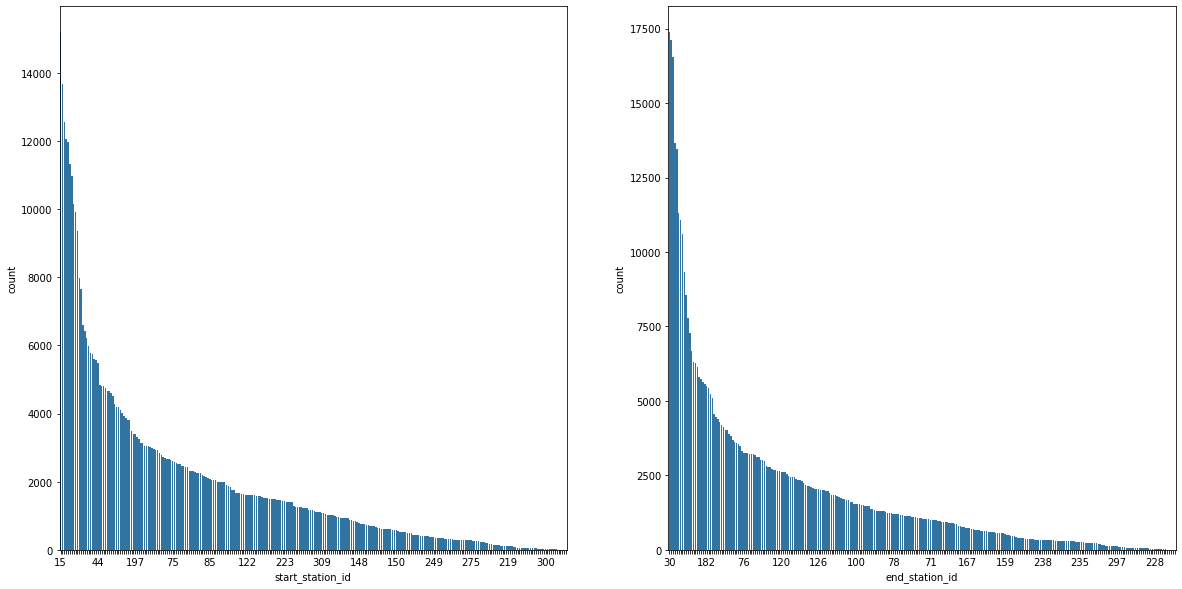

In [10]:
# The station is a qualitative variable ==> use bar chart
plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
plt_bar('start_station_id')

plt.subplot(1,2,2)
plt_bar('end_station_id')


It's clear that there're some stations that have more trips than another stations, getting the most, say 5, stations that has more trips will help the company to take care of these stations more.

In [11]:
print('The top 5 stations as a start point are')
print(trips.start_station_id.value_counts().sort_values()[-5:])

print('\nThe top 5 stations as an end point are')
print(trips.end_station_id.value_counts().sort_values()[-5:])

The top 5 stations as a start point are
58    11960
67    12055
30    12546
6     13664
15    15187
Name: start_station_id, dtype: int64

The top 5 stations as an end point are
21    13443
67    13658
6     16531
15    17109
30    17378
Name: end_station_id, dtype: int64


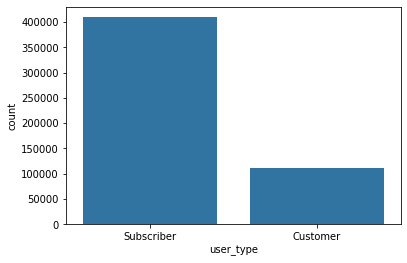

In [12]:
# See the distribution of the user type
sb.countplot(data = trips, x = 'user_type', color = base_color);

As expected, subscriber has more number of trips, around 4 times more than the casual customer. 

In [13]:
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


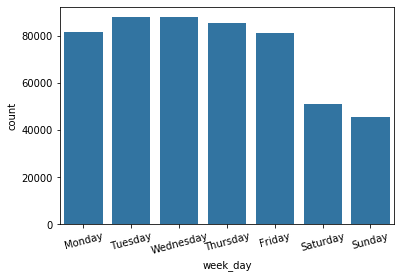

In [14]:
# The time and day might be an important features to consider.
# Let's first extract the day of the week and add it to the dataframe
trips['week_day'] = trips.start_time.dt.dayofweek
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

trips.week_day = trips.week_day.replace([0,1,2,3,4,5,6], week_days)

#Now, plot the bar chart of the number of trips on each day of the week
sb.countplot(data = trips, x = 'week_day', color = base_color, order = week_days);
plt.xticks(rotation = 15);

The number of trips has a notable drop on the weekends. This might be an indication that most people use bikes to get to their work

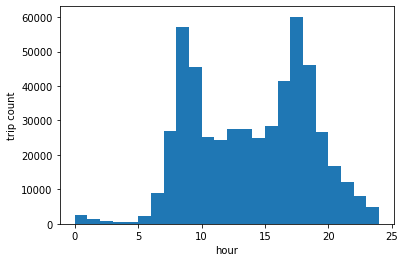

In [15]:
# Now let's see the distribution over the hours of the day
bin_edges = np.arange(0,25,1)
trips['start_hour'] = trips.start_time.dt.hour
plt.hist(data = trips, x = 'start_hour', bins = bin_edges)
plt.ylabel('trip count')
plt.xlabel('hour');

The distribution is bimodal. There're 2 intervals where the number of trips has a notable increased. These intervals are around 8 AM, and 5 PM. These hours are the start and end time of the work day. This emphasize the fact that most people use bikes to get to their work.

86369

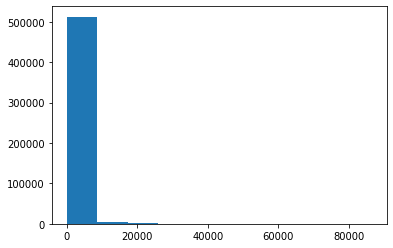

In [16]:
# Now, let's see the distribution of the duration to detect outliers if exist, and get an inution about the the duration.
plt.hist(data = trips, x = 'duration_sec');
trips.duration_sec.max()

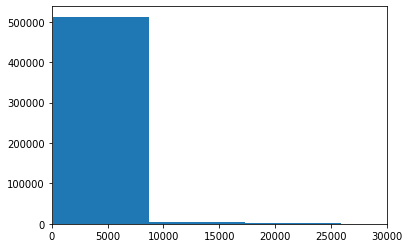

In [17]:
#Most of the values fall below 30000, let's zoom in that area
plt.hist(data = trips, x = 'duration_sec');
plt.xlim((0,30000));

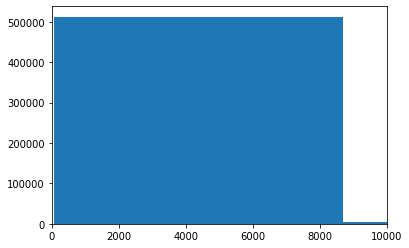

In [18]:
#Zoom more
plt.hist(data = trips, x = 'duration_sec');
plt.xlim((0,10000));

We can conclude that most of the trips fall below 9000 seconds. i.e. 2.5 hours.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration distribution were unfairly distributed, most of the trips has duration around 2.5 hours, but I didn't exclude the trips with very high value of duration (like 89369 which is almost a day), as trips with these durations return a high revenus, but we can conclude that most prople use bikes for short-trips, around 2 hours.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data types of some features has been changed. 
* start_time, end_time to timestamp
* user_type to categorical type
* start_station_id, end_station_id, bike_id to string object

> The station_name,station_latitude, and station_longitude for the start and end point need to be seperated on another table. i.e. we shold have a table for the trip information (duration_sec, start_time, end_time, start_station_id, end_station_id, bike_id, user_type) and another table for the station information (station_name, station_latitude, station_longitude), but since this won't effect our analysis, I keep it as it it for simplicity. 
<br>Adding the day_week, start_hour repeat an information that could be extracted from the start_time, but using such an info make the visualization dramatically easier. It can be dropped later but I'll leave it. 

## Bivariate Exploration
> Let's combine 2 variables from the previous section to find relationships among variables.
> The feature we explore in the previous section was station, user_type, week_day, start_hour, and duration

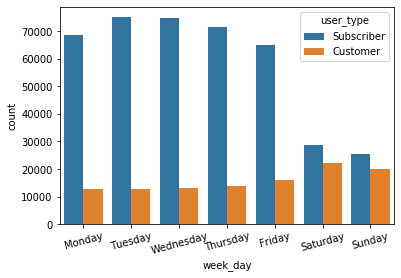

In [19]:
# Let's explore if the member user has relation with the week_day or the hour
sb.countplot(data = trips, x = 'week_day', hue = 'user_type', order = week_days)
plt.xticks(rotation = 15);

We can see from the plot that the number of trips by subscriber are more than those taken by casual customers in general. Also, the number of trips by subscriber decreased on the weekend, while the number of the casual customers increased on the weekends. This might indicates that subscriber pay for membership as they use the bike all the week days to get to their work, while casual users use anothr mean of transport to get to their work, and use bikes for other usage.
<br>To emphasize this fact, let's see if this is reflected by the relationship between the user_type and hours.

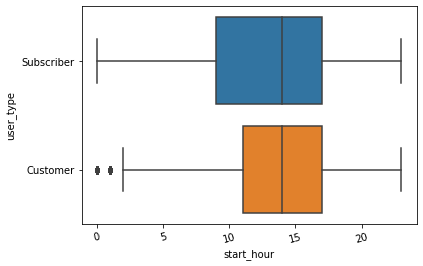

In [20]:
sb.boxplot(data = trips, x = 'start_hour', y = 'user_type')
plt.xticks(rotation = 15);

This plot doesn't reflect a good estimation whether the subscriber use the bikes to get to their work and not the casual customer. The max, third quartile, and the medians are equals. The onlu difference is the the min and first quartile, and it's not a huge difference that lead to a good interpretation.

The other factor that might affected by the user type is the duration. Usually, if the user is going to use the bike for a long time, he/she will pay for subscription. The following plot will show if this fact is exist in this dataset.

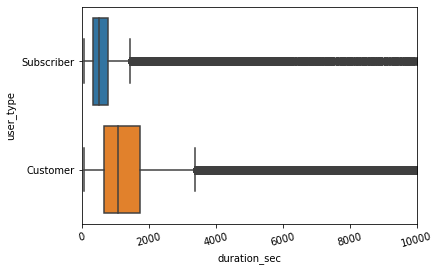

In [21]:
sb.boxplot(data = trips, x = 'duration_sec', y = 'user_type')
plt.xticks(rotation = 15);
plt.xlim((0,10000));

As opposed to expectations, the usual customer has a higher median and higher IQR than subscriber. This might be due to the fact that subscriber use bikes for short important trips as going to work, and customer use it for occasinaly trips. <br> Now, use another combination of factors (week_day and start_hour) to emphasize why these bikes ae used 

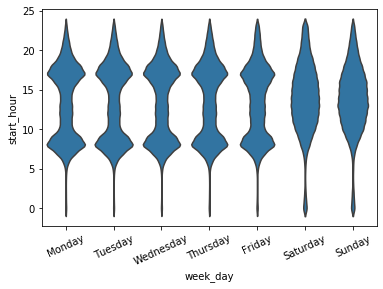

In [22]:
sb.violinplot(data = trips, x = 'week_day', y = 'start_hour', color = base_color, order = week_days, inner = None)
plt.xticks(rotation = 25);

It's clear that the weekends have different trend than the work days. On weekends, more bikes are used between 10AM to 5PM, less are used on the start and end of the day, while the work days behave the opposite, most bikes are used in the start and end of the work day (8 AM, 5PM)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The duration of the trip doesn't seem to be a good feature to work through, as it's usually the same except for some outliers. The count of the trips seams a better way to decide how the busniess work and what factors could effect it.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  Yes, first, the number of trips by subscriber decreased on the weekend, opposite to casual customers, and subscriber in general do more trips. Also, On weekends, more bikes are used between 10AM to 5PM, less are used on the start and end of the day, while the work days behave the opposite, most bikes are used in the start and end of the work day (8 AM, 5PM).

## Multivariate Exploration

> In this section, we'll focus on the main features that reflect useful info. in the bivariate exploration. that is, user_type, week_day, and start_hour. 

> The user_type, week_days are qualitative, wherease the start_hour is quantitative. 

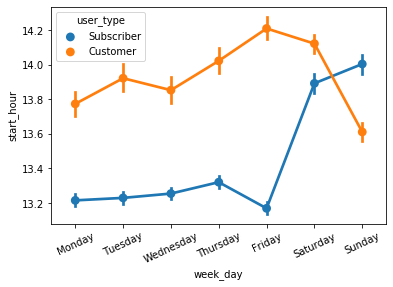

In [23]:
sb.pointplot(data = trips, x = 'week_day', y = 'start_hour' , hue = 'user_type', order = week_days)
plt.xticks(rotation = 25);

The subscriber starts earlier on week days than casual customer, the opposite in the weekend.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The subscribers use the bikes early on weekdays, and late on weekend, while the customer behave the opposite. In general, subscriber usually start much earlier. This emphasize that subscriber use the bikes to get to their work. 

### Were there any interesting or surprising interactions between features?

> This part emphasize what we observe in the bivariate expaloration more than giving something new, but it gives a good understanding of how multiple factors interact with each other.

# Resources
* https://stackoverflow.com/questions/38947115/how-to-decrease-the-density-of-x-ticks-in-seaborn
* https://stackoverflow.com/questions/52398383/finding-day-of-the-week-for-a-datetime64